In [41]:
#Fitting a high-order polynomial curve to the tuner profile to empirically find the max and min values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

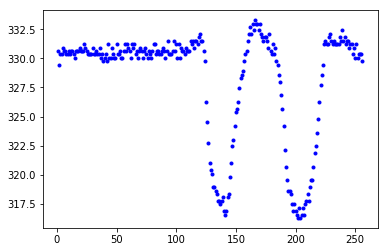

In [42]:
#Parse and plot
sample_xf = pd.ExcelFile('sample_profile.xlsx')
sample_pf = sample_xf.parse('Sheet1')
plt.plot(sample_pf['Index'],sample_pf['Distance'],'b.')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


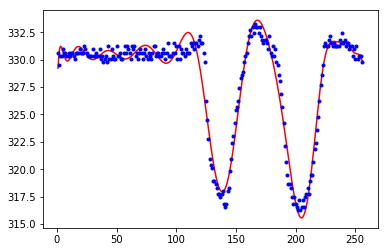

In [43]:
import numpy.polynomial.polynomial as poly
x_new = np.linspace(sample_pf['Index'][0], sample_pf['Index'][255], num=len(sample_pf['Index'])*10)
coefs = poly.polyfit(sample_pf['Index'], sample_pf['Distance'], 30)
ffit = poly.polyval(x_new, coefs)
plt.plot(x_new, ffit, 'r-')
plt.plot(sample_pf['Index'],sample_pf['Distance'],'b.')